In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

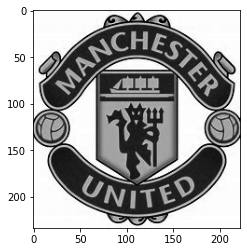

In [2]:
image = plt.imread("mu.jpeg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

## KERNEL

In [3]:
kernel_3x3 = np.full((3,3), 1/9)
kernel_9x9 = np.full((9,9), 1/81)

kernelsharp = np.array([[1/9, 1/9, 1/9], 
                        [1/9, 8/9, 1/9], 
                        [1/9, 1/9, 1/9]])

kernelsmooth = np.array([[1/10, 1/10, 1/10], 
                         [1/10,  1/5, 1/10], 
                         [1/10, 1/10, 1/10]])

In [4]:
Sobelx = np.array([ [-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
Sobely = np.array([ [ 1, 2, 1],
                    [ 0, 0, 0],
                    [-1,-2,-1]])

Prewitx = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])
Prewity = np.array([[ 1, 1, 1],
                    [ 0, 0, 0],
                    [-1,-1,-1]])

Robertp = np.array([[ 1, 0],
                    [ 0,-1]])
Robertm = np.array([[ 0, 1],
                    [-1, 0]])

In [5]:
def convolution(img, kernel):
     if len(kernel)%2 == 0:
          n = int(len(kernel)/2)
          padImg = np.pad (img, ([n-1,n],[n-1,n]))
     else:
          n = int((len(kernel)-1)/2)
          padImg = np.pad (img, ([n,n],[n,n]))

     result = np.zeros(img.shape).astype(int)
     for i in range(img.shape[0]):
          for j in range(img.shape[1]):
               for k in range(len(kernel)):
                    for l in range(len(kernel)):
                         result[i,j] += padImg[i+k,j+l] * kernel[k][l]
     return result
     

In [6]:
def meanFiltering(img, kernel):
     if len(kernel)%2 == 0:
          n = int(len(kernel)/2)
          padImg = np.pad (img, ([n-1,n],[n-1,n]))
     else:
          n = int((len(kernel)-1)/2)
          padImg = np.pad (img, ([n,n],[n,n]))

     result = np.zeros(img.shape).astype(int)
     for i in range(img.shape[0]):
          for j in range(img.shape[1]):
               for k in range(len(kernel)):
                    for l in range(len(kernel)):
                         result[i,j] += padImg[i+k,j+l] * kernel[k][l]
     return result

In [7]:
def median(arr):
     n = len(arr)
     sorted_arr = sorted(arr)
     if n % 2 == 0:
        median1 = sorted_arr[n//2]
        median2 = sorted_arr[n//2 - 1]
        median = (median1 + median2)/2
     else:
        median = sorted_arr[n//2]
     return median

In [8]:
def medianFiltering(img,kernel):
     if len(kernel)%2 == 0:
          n = int(len(kernel)/2)
          padImg = np.pad (img, ([n-1,n],[n-1,n]))
     else:
          n = int((len(kernel)-1)/2)
          padImg = np.pad (img, ([n,n],[n,n]))

     result = np.zeros(img.shape).astype(int)
     for i in range(img.shape[0]):
          for j in range(img.shape[1]):
               temp = np.zeros(len(kernel)*len(kernel))
               indeks=0
               for k in range(len(kernel)):
                    for l in range(len(kernel)):
                         temp[indeks] += padImg[i+k,j+l]
                         indeks+=1
               result[i,j] = median(temp) 
     return result

In [9]:
def modus(arr):
     count = {}
     for num in arr:
          if num in count:
               count[num] += 1
          else:
               count[num] = 1
     max_count = 0
     modus = None
     for num in count: 
          if count[num] >max_count:
               max_count = count[num]
               modus = num
     return modus

In [10]:
def modusFiltering(img,kernel):
     if len(kernel)%2 == 0:
          n = int(len(kernel)/2)
          padImg = np.pad (img, ([n-1,n],[n-1,n]))
     else:
          n = int((len(kernel)-1)/2)
          padImg = np.pad (img, ([n,n],[n,n]))

     result = np.zeros(img.shape).astype(int)
     for i in range(img.shape[0]):
          for j in range(img.shape[1]):
               temp = np.zeros(len(kernel)*len(kernel))
               indeks=0
               for k in range(len(kernel)):
                    for l in range(len(kernel)):
                         temp[indeks] += padImg[i+k,j+l]
                         indeks+=1
               result[i,j] = modus(temp)
     return result

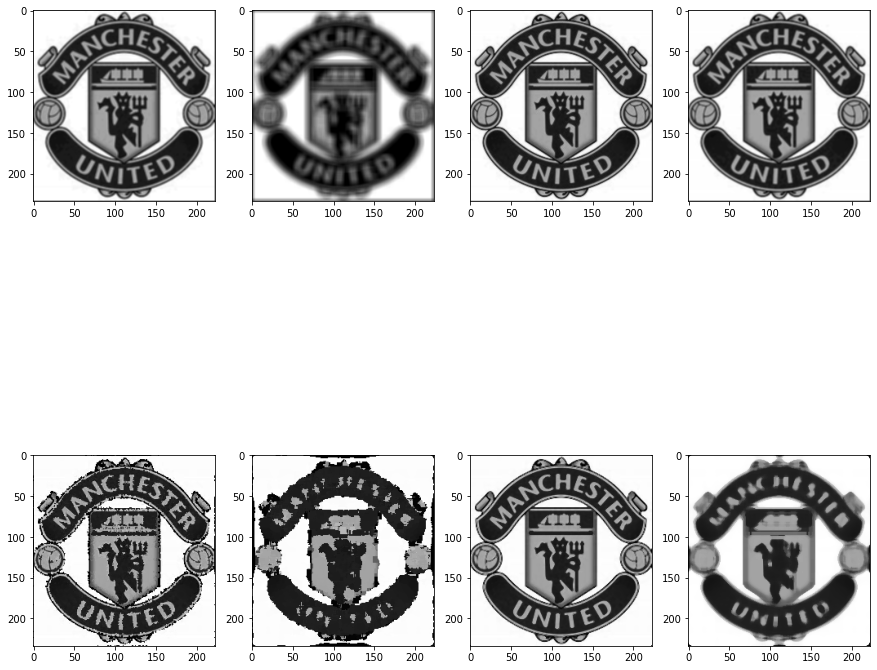

In [11]:
mean3x3 = meanFiltering(gray,kernel_3x3)
mean9x9 = meanFiltering(gray,kernel_9x9)
sharpImg = meanFiltering(gray,kernelsharp)
smoothImg = meanFiltering(gray,kernelsmooth)
modus3x3 = modusFiltering(gray,kernel_3x3)
modus9x9 = modusFiltering(gray,kernel_9x9)
median3x3 = medianFiltering(gray,kernel_3x3)
median9x9 = medianFiltering(gray,kernel_9x9)

plt.figure(figsize=(15,15))
plt.subplot(2,4,1)
plt.imshow(mean3x3,cmap='gray')
plt.subplot(2,4,2)
plt.imshow(mean9x9,cmap='gray')
plt.subplot(2,4,3)
plt.imshow(sharpImg,cmap='gray')
plt.subplot(2,4,4)
plt.imshow(smoothImg,cmap='gray')
plt.subplot(2,4,5)
plt.imshow(modus3x3,cmap='gray')
plt.subplot(2,4,6)
plt.imshow(modus9x9,cmap='gray')
plt.subplot(2,4,7)
plt.imshow(median3x3,cmap='gray')
plt.subplot(2,4,8)
plt.imshow(median9x9,cmap='gray')



In [12]:
def Edge_Detection(image,kernel1,kernel2):
     konv1 = convolution(image,kernel1)
     konv2 = convolution(image,kernel2)

     square1 = konv1 * konv1
     square2 = konv2 * konv2
     
     hasil_jumlah = square1 + square2
     result = np.sqrt(hasil_jumlah)
     return result

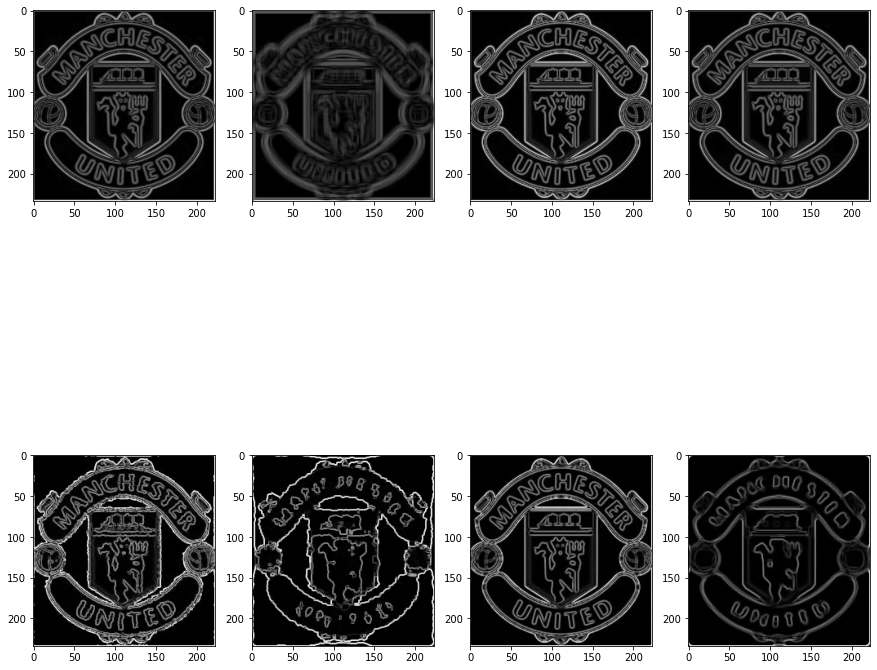

In [13]:
sobel_mean3x3 = Edge_Detection(mean3x3,Sobelx,Sobely)
sobel_mean9x9 = Edge_Detection(mean9x9,Sobelx,Sobely)
sobel_sharpImg = Edge_Detection(sharpImg,Sobelx,Sobely)
sobel_smoothImg = Edge_Detection(smoothImg,Sobelx,Sobely)
sobel_modus3x3 = Edge_Detection(modus3x3,Sobelx,Sobely)
sobel_modus9x9 = Edge_Detection(modus9x9,Sobelx,Sobely)
sobel_median3x3 = Edge_Detection(median3x3,Sobelx,Sobely)
sobel_median9x9 = Edge_Detection(median9x9,Sobelx,Sobely)

plt.figure(figsize=(15,15))
plt.subplot(2,4,1)
plt.imshow(sobel_mean3x3,cmap='gray')
plt.subplot(2,4,2)
plt.imshow(sobel_mean9x9,cmap='gray')
plt.subplot(2,4,3)
plt.imshow(sobel_sharpImg,cmap='gray')
plt.subplot(2,4,4)
plt.imshow(sobel_smoothImg,cmap='gray')
plt.subplot(2,4,5)
plt.imshow(sobel_modus3x3,cmap='gray')
plt.subplot(2,4,6)
plt.imshow(sobel_modus9x9,cmap='gray')
plt.subplot(2,4,7)
plt.imshow(sobel_median3x3,cmap='gray')
plt.subplot(2,4,8)
plt.imshow(sobel_median9x9,cmap='gray')

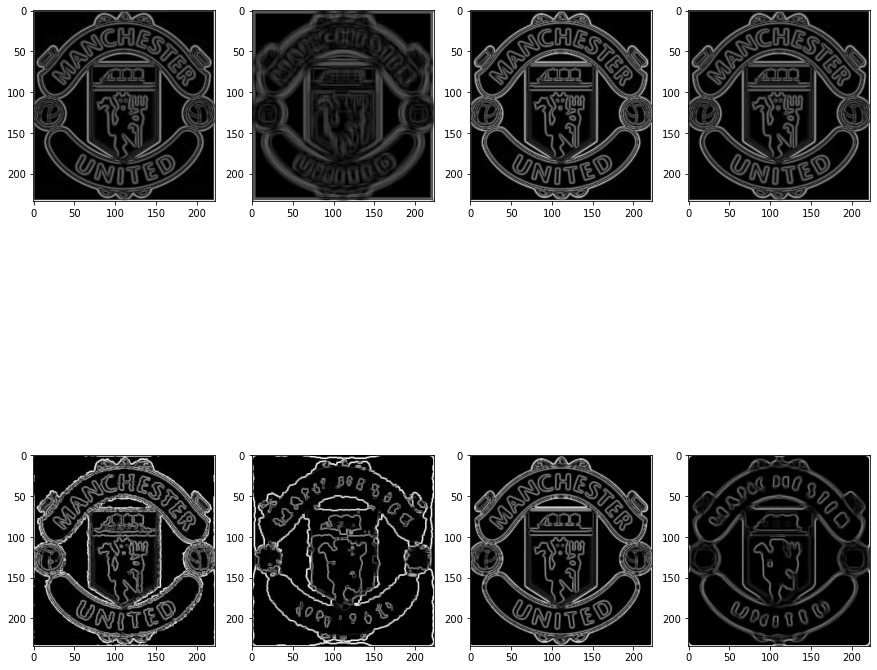

In [14]:
prewit_mean3x3 = Edge_Detection(mean3x3,Prewitx,Prewity)
prewit_mean9x9 = Edge_Detection(mean9x9,Prewitx,Prewity)
prewit_sharpImg = Edge_Detection(sharpImg,Prewitx,Prewity)
prewit_smoothImg = Edge_Detection(smoothImg,Prewitx,Prewity)
prewit_modus3x3 = Edge_Detection(modus3x3,Prewitx,Prewity)
prewit_modus9x9 = Edge_Detection(modus9x9,Prewitx,Prewity)
prewit_median3x3 = Edge_Detection(median3x3,Prewitx,Prewity)
prewit_median9x9 = Edge_Detection(median9x9,Prewitx,Prewity)

plt.figure(figsize=(15,15))
plt.subplot(2,4,1)
plt.imshow(prewit_mean3x3,cmap='gray')
plt.subplot(2,4,2)
plt.imshow(prewit_mean9x9,cmap='gray')
plt.subplot(2,4,3)
plt.imshow(prewit_sharpImg,cmap='gray')
plt.subplot(2,4,4)
plt.imshow(prewit_smoothImg,cmap='gray')
plt.subplot(2,4,5)
plt.imshow(prewit_modus3x3,cmap='gray')
plt.subplot(2,4,6)
plt.imshow(prewit_modus9x9,cmap='gray')
plt.subplot(2,4,7)
plt.imshow(prewit_median3x3,cmap='gray')
plt.subplot(2,4,8)
plt.imshow(prewit_median9x9,cmap='gray')

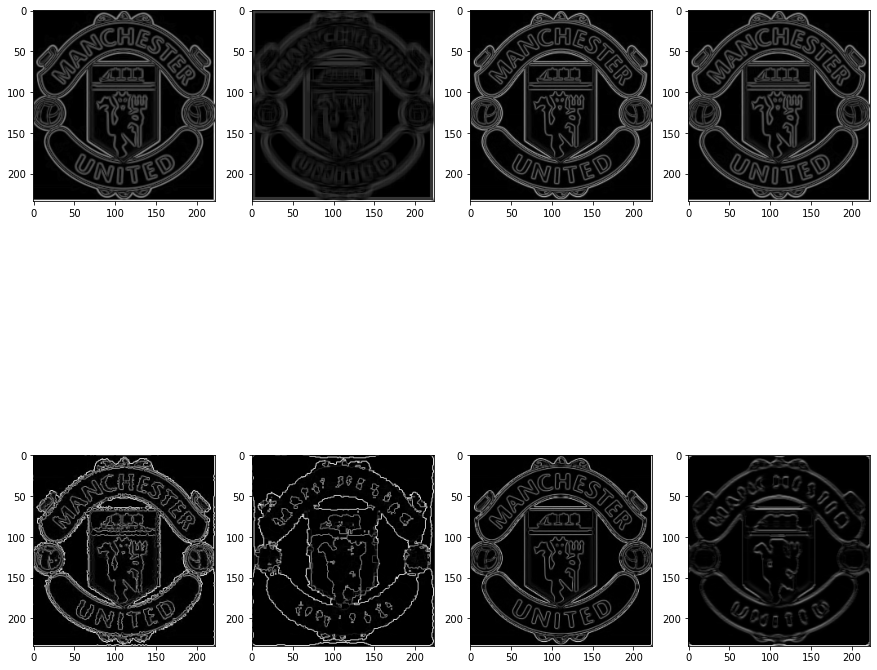

In [15]:
robert_mean3x3 = Edge_Detection(mean3x3,Robertp,Robertm)
robert_mean9x9 = Edge_Detection(mean9x9,Robertp,Robertm)
robert_sharpImg = Edge_Detection(sharpImg,Robertp,Robertm)
robert_smoothImg = Edge_Detection(smoothImg,Robertp,Robertm)
robert_modus3x3 = Edge_Detection(modus3x3,Robertp,Robertm)
robert_modus9x9 = Edge_Detection(modus9x9,Robertp,Robertm)
robert_median3x3 = Edge_Detection(median3x3,Robertp,Robertm)
robert_median9x9 = Edge_Detection(median9x9,Robertp,Prewity)

plt.figure(figsize=(15,15))
plt.subplot(2,4,1)
plt.imshow(robert_mean3x3,cmap='gray')
plt.subplot(2,4,2)
plt.imshow(robert_mean9x9,cmap='gray')
plt.subplot(2,4,3)
plt.imshow(robert_sharpImg,cmap='gray')
plt.subplot(2,4,4)
plt.imshow(robert_smoothImg,cmap='gray')
plt.subplot(2,4,5)
plt.imshow(robert_modus3x3,cmap='gray')
plt.subplot(2,4,6)
plt.imshow(robert_modus9x9,cmap='gray')
plt.subplot(2,4,7)
plt.imshow(robert_median3x3,cmap='gray')
plt.subplot(2,4,8)
plt.imshow(robert_median9x9,cmap='gray')